#  <font color='dark gary'> Anomaly detection method
https://scikit-learn.org/stable/modules/outlier_detection.html#outlier-detection

### 3. Unsupervised learning (Outlier detection)
- inlier와 outlier를 포함한 훈련데이터에서 outliers를 탐색
        * Anomaly는 outlier와 novelty를 모두 호칭

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
get_ipython().run_line_magic('matplotlib', 'inline')

#  <font color='red'> 2. Semi-Supervised learning (Novelty detection)
## One-class SVM with non-linear kernel (RBF)
- OCSVM assumes that anomalies can form dense clusters as long as they form a low-density region in the training dataset.
- OCSVM mode is trained in only one class, referred to as the normal class. The model learns all the features and patterns of the normal class 
- https://scikit-learn.org/stable/modules/generated/sklearn.svm.OneClassSVM.html#sklearn.svm.OneClassSVM

#### <p> <font color= 'blue'> Intuition : One-class SVM is based on SVM, which uses a hyperplane to seperate two classes while a  <b>One-class SVM uses a hypersphere to emcompass all of the observations<b> <p>

### <font color='brwon'> 지도학습데이터를 target을 모른다고 가정하여 OneClass SVM 비지도학습으로 이상치 탐색 결과와 비교

- UCI사이트에서 attribution information copy

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/'
df = pd.read_csv(url + 'breast-cancer-wisconsin.data')
df.columns = ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
      'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
      'Normal Nucleoli', 'Mitoses', 'Class'] # (2 for benign, 4 for malignant)
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [3]:
df['Class'].value_counts(normalize=True)

2    0.654728
4    0.345272
Name: Class, dtype: float64

In [4]:
df['Bare Nuclei'] = df['Bare Nuclei'].replace('?', 0)
df.loc[df['Class'] ==4, 'normal'] = -1  # -1  4 for malignant
df.loc[df['Class'] ==2, 'normal'] = 1 # 1 for benign
df.shape
df.head()

(698, 12)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class,normal
0,1002945,5,4,4,5,7,10,3,2,1,2,1.0
1,1015425,3,1,1,1,2,2,3,1,1,2,1.0
2,1016277,6,8,8,1,3,4,3,7,1,2,1.0
3,1017023,4,1,1,3,2,1,3,1,1,2,1.0
4,1017122,8,10,10,8,7,10,9,7,1,4,-1.0


## 데이터 생성

In [5]:
df = df.drop(['Sample code number', 'Class'], axis=1)

In [6]:
train_rec_count=int(len(df)*.8)
df_train= df.iloc[:train_rec_count,:]
df_train.shape
df_train.head()
df_train['normal'].value_counts(normalize=True)

(558, 10)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,normal
0,5,4,4,5,7,10,3,2,1,1.0
1,3,1,1,1,2,2,3,1,1,1.0
2,6,8,8,1,3,4,3,7,1,1.0
3,4,1,1,3,2,1,3,1,1,1.0
4,8,10,10,8,7,10,9,7,1,-1.0


 1.0    0.630824
-1.0    0.369176
Name: normal, dtype: float64

In [7]:
df_test=df.iloc[train_rec_count:,:]
df_test.shape
df_test.head()
df_test['normal'].value_counts(normalize=True)

(140, 10)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,normal
558,5,1,1,1,2,1,2,1,1,1.0
559,5,1,1,1,2,1,3,1,1,1.0
560,5,1,1,1,2,1,3,1,1,1.0
561,1,1,1,1,2,1,3,1,1,1.0
562,3,1,1,1,2,1,2,1,1,1.0


 1.0    0.75
-1.0    0.25
Name: normal, dtype: float64

### 정상과 비정상이 있는 훈련데이터(X_train, y_train)

In [8]:
X_train= df_train.drop('normal', axis=1)
y_train= df_train['normal']
y_train.value_counts(normalize=True)
X_train.shape, y_train.shape

 1.0    0.630824
-1.0    0.369176
Name: normal, dtype: float64

((558, 9), (558,))

### 검증데이터(X_test)

In [9]:
X_test= df_test.drop('normal', axis=1)
y_test= df_test['normal']
y_test.value_counts(normalize=True)
X_test.shape, y_test.shape

 1.0    0.75
-1.0    0.25
Name: normal, dtype: float64

((140, 9), (140,))

### Creating the One-Class Support Vector Macine

In [10]:
nu_percentage= df_train['normal'].value_counts(normalize=True).iloc[1]
print(f'부적합율(훈련데이터:X_train)은 {nu_percentage*100} %')

부적합율(훈련데이터:X_train)은 36.91756272401434 %


In [11]:
from sklearn.svm import OneClassSVM
ocsvm = OneClassSVM(nu=nu_percentage)

## 1 . 지도학습 : 지도학습후 예측결과(yhat)와 실제자료(df_test)와 비교 

In [12]:
ocsvm.fit(X_train, y_train)

OneClassSVM(nu=0.36917562724014336)

<AxesSubplot:>

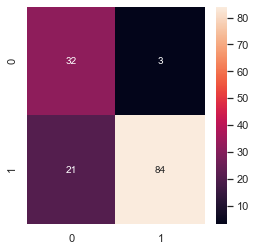

In [13]:
from sklearn.metrics import confusion_matrix

yhat=ocsvm.predict(X_test)

df_test['onesvm_anomaly']= yhat

cm=confusion_matrix(df_test['normal'], df_test['onesvm_anomaly'])
plt.rcParams["figure.figsize"] = (4,4)
sns.heatmap(cm, annot=True)

In [14]:
from sklearn.metrics import classification_report
target_names = ['Normal(1)', 'Abnormal(-1)']
print(classification_report(df_test['normal'], df_test['onesvm_anomaly'], target_names=target_names))

              precision    recall  f1-score   support

   Normal(1)       0.60      0.91      0.73        35
Abnormal(-1)       0.97      0.80      0.88       105

    accuracy                           0.83       140
   macro avg       0.78      0.86      0.80       140
weighted avg       0.88      0.83      0.84       140



In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print(" Accuracy Score for One-Class SVM :", accuracy_score(df_test['normal'], df_test['onesvm_anomaly']))
print(" Precision for One-Class SVM :", precision_score(df_test['normal'], df_test['onesvm_anomaly']))
print(" Recall for One-Class SVM :", recall_score(df_test['normal'], df_test['onesvm_anomaly']))
print(" Confusion Matrix: \n", cm)

 Accuracy Score for One-Class SVM : 0.8285714285714286
 Precision for One-Class SVM : 0.9655172413793104
 Recall for One-Class SVM : 0.8
 Confusion Matrix: 
 [[32  3]
 [21 84]]


## 2. 비지도학습 훈련

In [16]:
ocsvm = OneClassSVM(nu=nu_percentage)
ocsvm.fit(X_train)

OneClassSVM(nu=0.36917562724014336)

<AxesSubplot:>

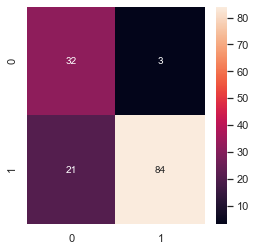

In [17]:
yhat=ocsvm.predict(X_test)

df_test['onesvm_anomaly']= yhat

cm=confusion_matrix(df_test['normal'], df_test['onesvm_anomaly'])
plt.rcParams["figure.figsize"] = (4,4)
sns.heatmap(cm, annot=True)

In [18]:
from sklearn.metrics import classification_report
target_names = ['Normal(1)', 'Abnormal(-1)']
print(classification_report(df_test['normal'], df_test['onesvm_anomaly'], target_names=target_names))

              precision    recall  f1-score   support

   Normal(1)       0.60      0.91      0.73        35
Abnormal(-1)       0.97      0.80      0.88       105

    accuracy                           0.83       140
   macro avg       0.78      0.86      0.80       140
weighted avg       0.88      0.83      0.84       140



In [19]:
print(" Accuracy Score for One-Class SVM :", accuracy_score(df_test['normal'], df_test['onesvm_anomaly']))
print(" Precision for One-Class SVM :", precision_score(df_test['normal'], df_test['onesvm_anomaly']))
print(" Recall for One-Class SVM :", recall_score(df_test['normal'], df_test['onesvm_anomaly']))
print(" Confusion Matrix: \n", cm)

 Accuracy Score for One-Class SVM : 0.8285714285714286
 Precision for One-Class SVM : 0.9655172413793104
 Recall for One-Class SVM : 0.8
 Confusion Matrix: 
 [[32  3]
 [21 84]]


# End

## Semi supervised with One-Class-SVM
https://www.kaggle.com/neoyipeng2018/one-class-svm-and-data-leakage

In [35]:
df = pd.read_csv('D:/2021_데이터솔루션/data/creditcard.csv')
df = df.sample(frac=0.2, random_state=10)
#df= df[['V1', 'V2', 'V3', 'V4', 'V5', 'Class']]
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
168367,119191.0,2.052427,-0.133236,-1.740621,0.277935,0.337999,-0.826933,0.334629,-0.227039,0.267655,...,-0.006518,0.121300,0.037733,-0.356498,0.147822,0.569149,-0.103929,-0.091958,8.73,0
110270,71750.0,1.220356,-0.159191,-0.444349,-0.094437,0.104457,-0.345790,0.170867,-0.094996,0.187572,...,-0.088775,-0.364654,-0.140851,-0.707308,0.415661,1.087767,-0.102532,-0.008335,59.95,0
243562,151977.0,0.892824,-1.440698,-0.637940,3.912871,0.099291,2.433288,-0.308891,0.603227,-0.113826,...,0.484969,0.487304,-0.122694,-0.598803,-0.594563,0.062841,-0.033426,0.038254,460.65,0
74702,55709.0,-3.146021,2.247634,0.901397,0.146162,-2.109360,-0.148312,-1.533191,2.073663,0.499394,...,0.050567,-0.037019,0.107000,0.392857,0.303597,0.379544,-0.148990,0.074965,4.78,0
98416,66654.0,1.194996,-0.007495,0.301285,0.750199,-0.297494,-0.405836,0.060410,-0.150482,0.400860,...,-0.234931,-0.545566,-0.089418,-0.064036,0.527305,0.294221,-0.025980,0.015637,44.31,0


In [36]:
df['Class'].value_counts()

0    56867
1       94
Name: Class, dtype: int64

In [37]:
df.loc[df['Class'] == 1, "Class"] = -1
df.loc[df['Class'] == 0, "Class"] = 1

In [40]:
df.Class.value_counts()

 1    56867
-1       94
Name: Class, dtype: int64

## sample

In [23]:
#getting random set of nonfraud data to train on
from sklearn.model_selection import train_test_split
non_fraud = df[df['Class']==1]
df_train, val = train_test_split(non_fraud, test_size=0.20, random_state=42)
fraud = df[df['Class']==-1]

In [41]:
df_train.head()
df_train.Class.value_counts()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
131680,79696.0,1.157288,-0.717299,0.787745,0.588479,-0.879001,0.821708,-0.881617,0.320784,-0.335193,...,-0.400197,-0.413285,-0.068262,-0.317172,0.508076,-0.272054,0.089757,0.018593,37.92,1
77714,57177.0,0.937478,-0.301552,1.019777,1.215814,-0.559337,0.767268,-0.579561,0.307631,0.351056,...,0.242217,0.715040,-0.198030,-0.272425,0.441226,-0.221013,0.068752,0.035590,92.00,1
183155,125677.0,0.723366,0.232700,-1.501419,-1.384075,0.559054,-0.338144,0.023269,-1.912261,-0.989661,...,1.167507,-1.052833,-0.142137,0.026026,1.142983,0.893529,0.024611,0.093828,2.00,1
182042,125235.0,1.915021,-1.435920,-0.405989,-0.604595,-1.104463,0.630937,-1.364598,0.301519,0.187598,...,-0.300861,-0.571804,0.283031,0.052744,-0.701806,0.440911,-0.021278,-0.028226,104.55,1
222849,143143.0,-0.258903,1.204659,-0.481956,-0.753390,1.584329,0.166690,0.959901,0.055190,-0.348060,...,0.025839,0.450661,-0.408743,-0.179684,-0.033830,0.576996,0.380982,0.253981,0.99,1


1    45493
Name: Class, dtype: int64

In [42]:
#getting random set of nonfraud data to train on
non_fraud = df[df['Class']==1]
fraud = df[df['Class']==-1]

In [43]:
from sklearn.model_selection import train_test_split
#getting random set of nonfraud data to train on
non_fraud = df[df['Class']==1]
X_train, X_test = train_test_split(non_fraud, test_size=0.20, random_state=42)
X_train.Class.value_counts()

1    45493
Name: Class, dtype: int64

In [27]:
X_train.shape
X_train

(45493, 31)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
131680,79696.0,1.157288,-0.717299,0.787745,0.588479,-0.879001,0.821708,-0.881617,0.320784,-0.335193,...,-0.400197,-0.413285,-0.068262,-0.317172,0.508076,-0.272054,0.089757,0.018593,37.92,1
77714,57177.0,0.937478,-0.301552,1.019777,1.215814,-0.559337,0.767268,-0.579561,0.307631,0.351056,...,0.242217,0.715040,-0.198030,-0.272425,0.441226,-0.221013,0.068752,0.035590,92.00,1
183155,125677.0,0.723366,0.232700,-1.501419,-1.384075,0.559054,-0.338144,0.023269,-1.912261,-0.989661,...,1.167507,-1.052833,-0.142137,0.026026,1.142983,0.893529,0.024611,0.093828,2.00,1
182042,125235.0,1.915021,-1.435920,-0.405989,-0.604595,-1.104463,0.630937,-1.364598,0.301519,0.187598,...,-0.300861,-0.571804,0.283031,0.052744,-0.701806,0.440911,-0.021278,-0.028226,104.55,1
222849,143143.0,-0.258903,1.204659,-0.481956,-0.753390,1.584329,0.166690,0.959901,0.055190,-0.348060,...,0.025839,0.450661,-0.408743,-0.179684,-0.033830,0.576996,0.380982,0.253981,0.99,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173233,121398.0,-0.971173,-0.157424,1.381921,-2.831128,0.564283,1.975495,-0.025600,0.722715,-1.130702,...,0.026753,-0.039047,-0.069899,-0.988981,0.332837,-0.348548,0.280426,0.100928,75.00,1
230399,146317.0,1.992688,-1.198573,-4.032719,-1.856956,2.508071,2.632478,0.055437,0.353460,-1.233929,...,0.567281,1.270748,-0.322958,0.813946,0.747830,0.304741,-0.104414,-0.073258,162.53,1
205914,135969.0,-13.779469,1.218903,-8.919588,0.830417,-3.006256,-0.190756,2.744452,0.423227,6.249664,...,-2.251229,0.002274,-1.934355,0.388344,0.917516,-0.774517,-0.227902,2.312638,144.00,1
7043,9232.0,-0.804375,0.454896,2.033208,-0.217545,0.049790,0.078605,0.054058,0.208289,1.776343,...,-0.159848,-0.123282,-0.239357,-0.042556,-0.068734,0.280788,-0.110211,0.123193,0.01,1


In [28]:
from sklearn import svm
model = svm.OneClassSVM(kernel='rbf', nu=0.0005, gamma=0.007)
model.fit(X_train)

OneClassSVM(gamma=0.007, nu=0.0005)

In [34]:
X_train.shape
X_train

(45493, 31)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
131680,79696.0,1.157288,-0.717299,0.787745,0.588479,-0.879001,0.821708,-0.881617,0.320784,-0.335193,...,-0.400197,-0.413285,-0.068262,-0.317172,0.508076,-0.272054,0.089757,0.018593,37.92,1
77714,57177.0,0.937478,-0.301552,1.019777,1.215814,-0.559337,0.767268,-0.579561,0.307631,0.351056,...,0.242217,0.715040,-0.198030,-0.272425,0.441226,-0.221013,0.068752,0.035590,92.00,1
183155,125677.0,0.723366,0.232700,-1.501419,-1.384075,0.559054,-0.338144,0.023269,-1.912261,-0.989661,...,1.167507,-1.052833,-0.142137,0.026026,1.142983,0.893529,0.024611,0.093828,2.00,1
182042,125235.0,1.915021,-1.435920,-0.405989,-0.604595,-1.104463,0.630937,-1.364598,0.301519,0.187598,...,-0.300861,-0.571804,0.283031,0.052744,-0.701806,0.440911,-0.021278,-0.028226,104.55,1
222849,143143.0,-0.258903,1.204659,-0.481956,-0.753390,1.584329,0.166690,0.959901,0.055190,-0.348060,...,0.025839,0.450661,-0.408743,-0.179684,-0.033830,0.576996,0.380982,0.253981,0.99,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173233,121398.0,-0.971173,-0.157424,1.381921,-2.831128,0.564283,1.975495,-0.025600,0.722715,-1.130702,...,0.026753,-0.039047,-0.069899,-0.988981,0.332837,-0.348548,0.280426,0.100928,75.00,1
230399,146317.0,1.992688,-1.198573,-4.032719,-1.856956,2.508071,2.632478,0.055437,0.353460,-1.233929,...,0.567281,1.270748,-0.322958,0.813946,0.747830,0.304741,-0.104414,-0.073258,162.53,1
205914,135969.0,-13.779469,1.218903,-8.919588,0.830417,-3.006256,-0.190756,2.744452,0.423227,6.249664,...,-2.251229,0.002274,-1.934355,0.388344,0.917516,-0.774517,-0.227902,2.312638,144.00,1
7043,9232.0,-0.804375,0.454896,2.033208,-0.217545,0.049790,0.078605,0.054058,0.208289,1.776343,...,-0.159848,-0.123282,-0.239357,-0.042556,-0.068734,0.280788,-0.110211,0.123193,0.01,1


In [44]:
fraud = df[df['Class']==-1]
fraud.head()
fraud.Class.value_counts()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
45203,42247.0,-2.524012,2.098152,-4.946075,6.456588,3.173921,-3.058806,-0.184710,-0.390420,-3.649812,...,0.027935,0.220366,0.976348,-0.290539,1.161002,0.663954,0.456023,-0.405682,1.00,-1
251866,155535.0,0.711155,2.617105,-4.722363,5.842970,-0.600179,-1.646313,-2.785198,0.540368,-3.044029,...,0.360501,-0.865526,0.139978,-0.336238,0.128449,-0.155646,0.799460,0.392170,3.90,-1
77387,57027.0,-2.335655,2.225380,-3.379450,2.178538,-3.568264,0.316814,-1.734948,1.449139,-1.980033,...,0.785540,0.297412,0.308536,-0.598416,-0.121850,-0.491018,0.701606,0.206966,444.17,-1
111690,72327.0,-4.198735,0.194121,-3.917586,3.920748,-1.875486,-2.118933,-3.614445,1.687884,-2.189871,...,0.801312,-0.183001,-0.440387,0.292539,-0.144967,-0.251744,1.249414,-0.131525,238.90,-1
42856,41273.0,-11.682215,6.332882,-13.297109,7.690772,-10.889891,-2.792360,-12.561783,7.287122,-7.570322,...,2.133456,-1.271509,-0.035304,0.615054,0.349024,-0.428923,-0.694935,-0.818970,173.07,-1


-1    94
Name: Class, dtype: int64

In [31]:
yhat=model.predict(fraud.drop('Class', axis=1))

ValueError: X.shape[1] = 30 should be equal to 31, the number of features at training time